In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
train_data = pd.read_csv("mitbih_train.csv", header = None)
test_data = pd.read_csv("mitbih_test.csv", header = None)

In [3]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
#  Exploratory Data Analysis

# checking null values
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [5]:
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [6]:
# casting into int
train_data[187] = train_data[187].astype('int')

In [7]:
test_data[187] = test_data[187].astype('int') 

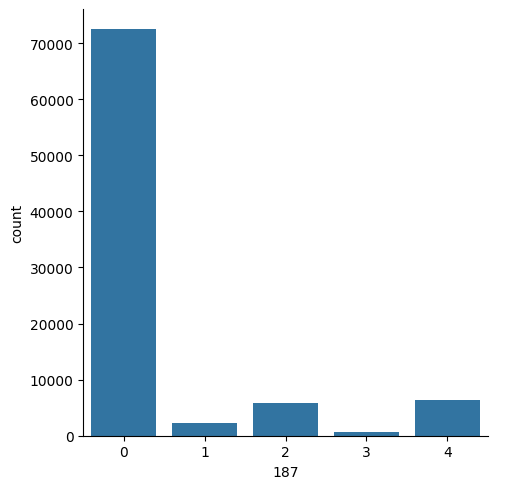

In [8]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_data)

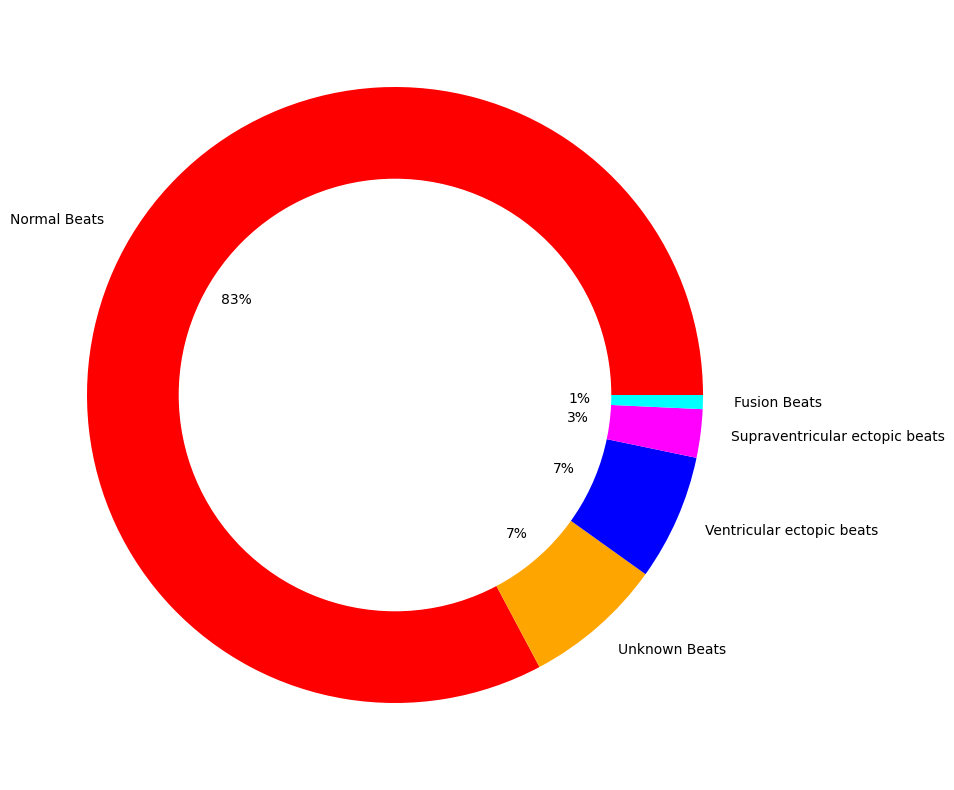

In [9]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


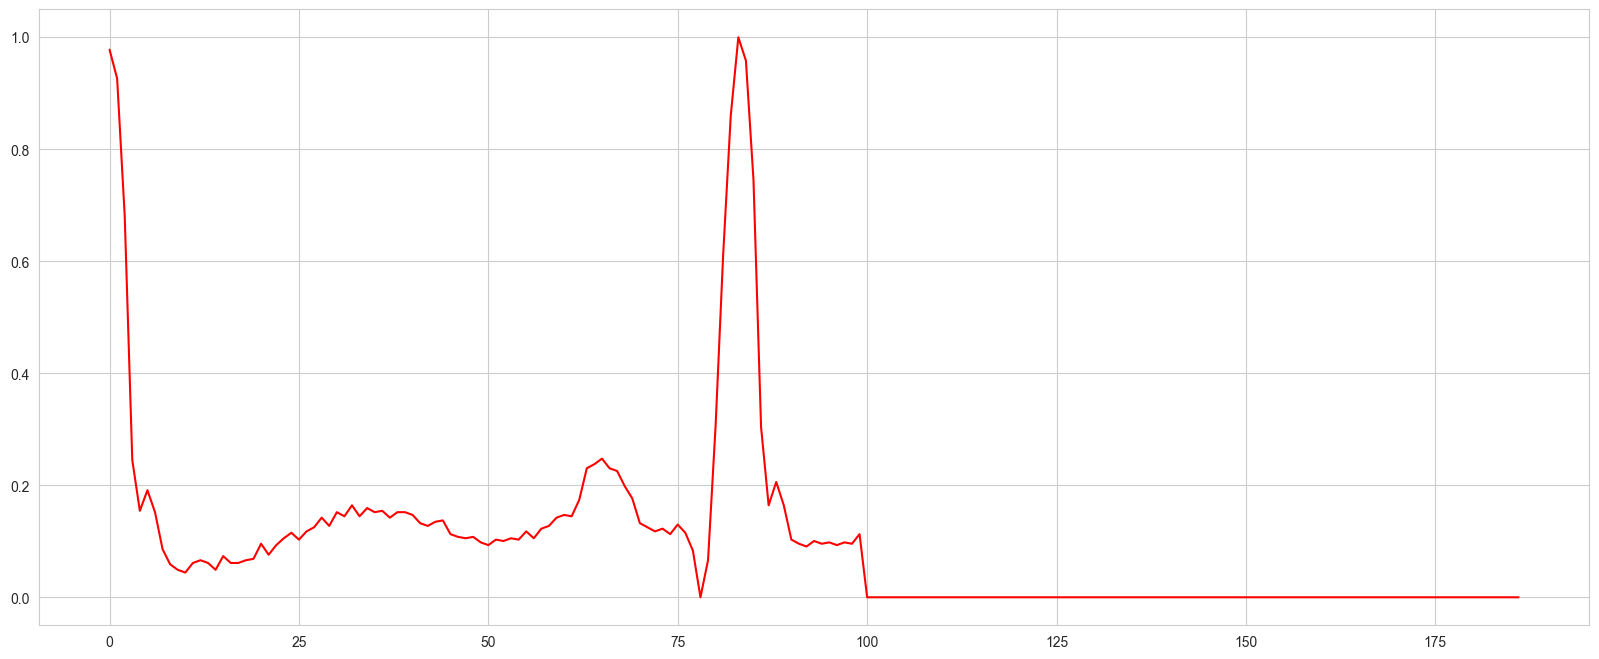

In [10]:

sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

In [11]:
# Splitting data into Each Classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

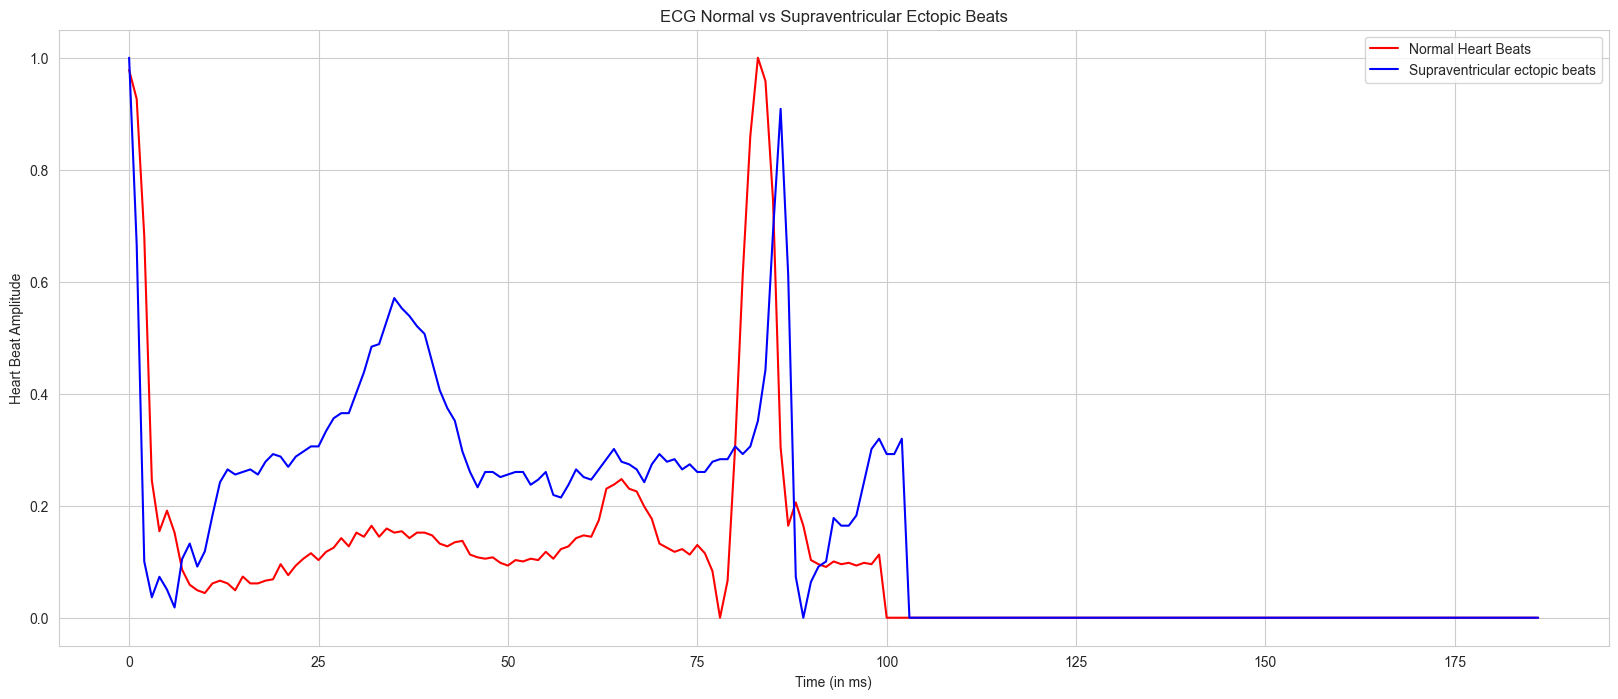

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

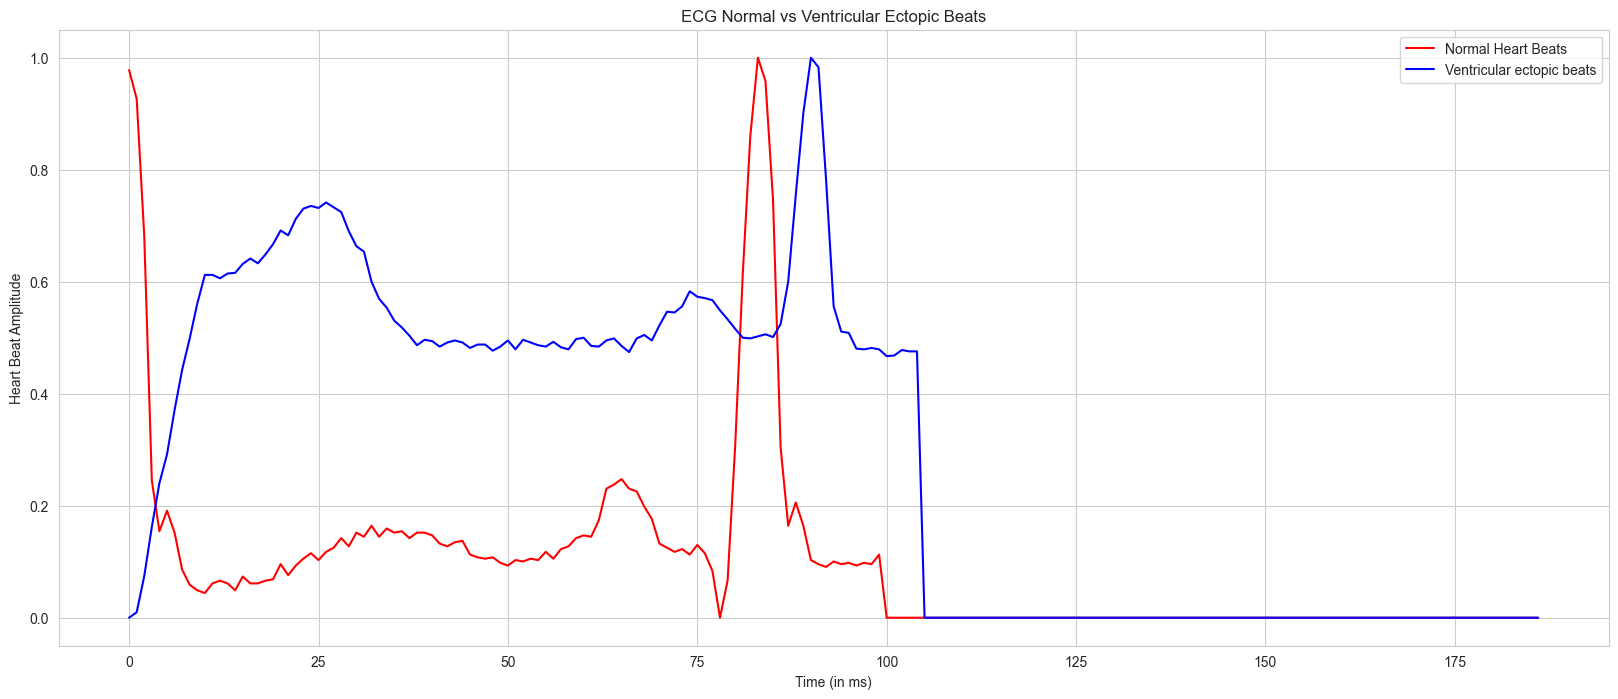

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()


In [14]:

from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)


In [15]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df_0 = train_data[train_data[187]==0].sample(n =20000, random_state=123)

In [16]:

# merge and all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

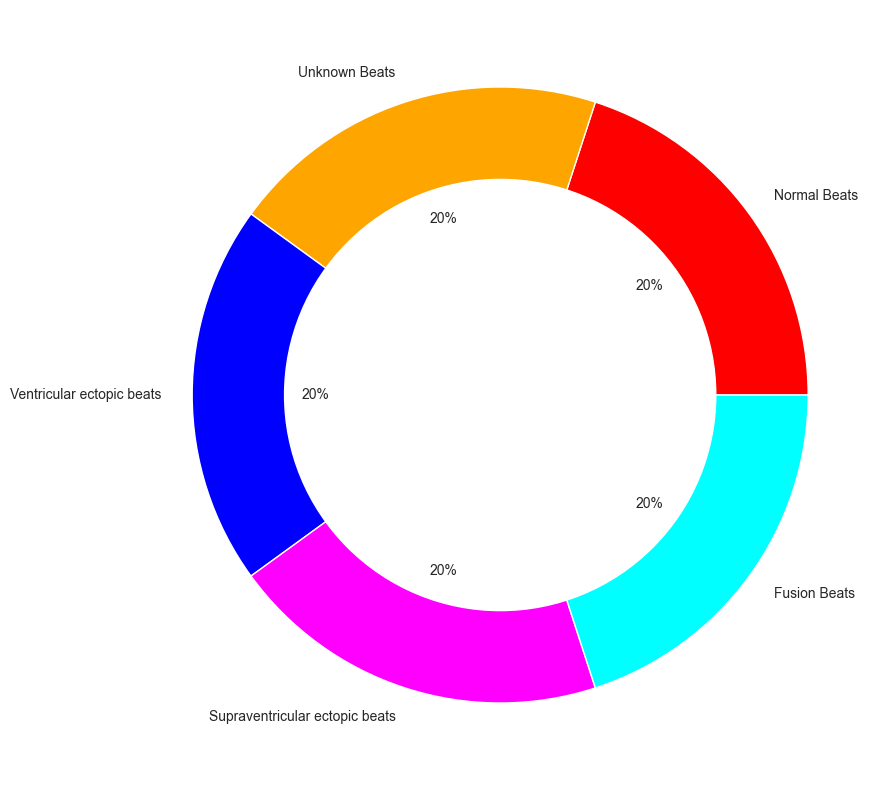

In [17]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

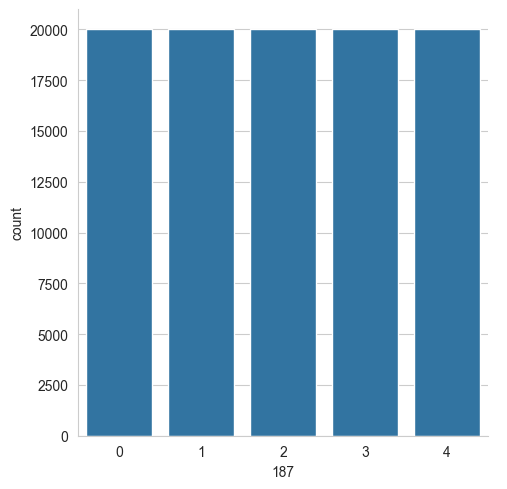

In [18]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [19]:
# target Y
target_train = train_df[187]
target_test = test_data[187]


In [20]:
target_train.unique()

array([0, 1, 2, 3, 4])

In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(target_train)

In [23]:
y_test = to_categorical(target_test)

In [24]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

In [25]:
# this data is in single dimension, 1D (no of samples, features)
X_train.shape

(100000, 187)

In [26]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [27]:
X_train.shape

(100000, 187, 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from tensorflow.keras.layers import BatchNormalization

In [30]:
def build_model():
    model = Sequential()
    
    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1
    
    # Normalization to avoid overfitting
    model.add(BatchNormalization())
    
    # Pooling 
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten 
    model.add(Flatten())

    # Fully connected layer
    # input layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [31]:
model = build_model()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
# This is for one sample, i.e. one row
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 187, 64)             │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 187, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 94, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 94, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 94, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 47, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 47, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 47, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          98,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,349 (599.02 KB)

 Trainable params: 152,965 (597.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [33]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.8974 - loss: 0.2848 - val_accuracy: 0.9272 - val_loss: 0.2159
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9739 - loss: 0.0772 - val_accuracy: 0.9453 - val_loss: 0.1727
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9829 - loss: 0.0518 - val_accuracy: 0.9732 - val_loss: 0.1008
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.9733 - val_loss: 0.1050
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9564 - val_loss: 0.1830
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9678 - val_loss: 0.1334
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9695 - val_loss: 0.1301
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.9940 - loss

In [34]:
# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9819 - loss: 0.0949


[0.14272837340831757, 0.9767951965332031]

<Axes: >

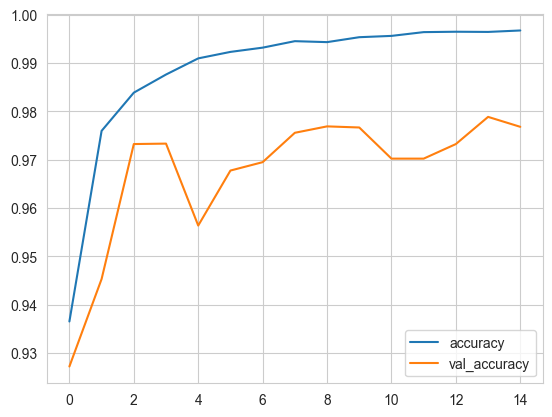

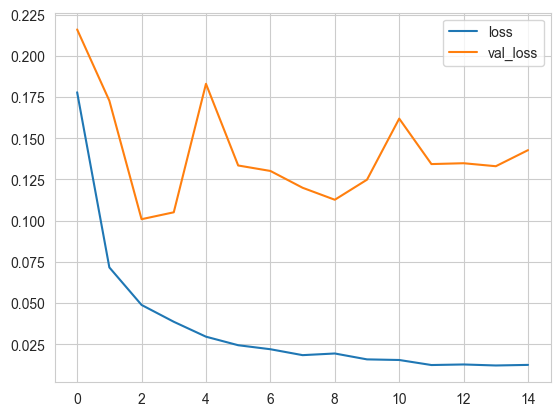

In [35]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [36]:
# Make Prediction
predict = model.predict(X_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [37]:
# Predicted o/p will be in probability distribution 
predict

array([[1.0000000e+00, 4.7854245e-11, 1.4683975e-13, 2.0060440e-20,
        1.1805639e-16],
       [1.0000000e+00, 2.1587079e-12, 8.9060224e-11, 2.6829412e-19,
        5.7593005e-16],
       [1.0000000e+00, 5.9222773e-11, 3.5217768e-13, 8.1890700e-19,
        5.6351217e-16],
       ...,
       [3.1939607e-09, 2.1434209e-12, 1.7577952e-15, 3.2860438e-18,
        1.0000000e+00],
       [1.4535196e-25, 4.6443966e-27, 3.3344785e-28, 0.0000000e+00,
        1.0000000e+00],
       [1.4317398e-23, 1.1555030e-29, 1.0056322e-28, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [38]:
# distributional probability to integers
yhat = np.argmax(predict, axis = 1)

In [ ]:
# Checking the confusion matrix and classification report

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

array([[17792,   256,    20,    36,    14],
       [   47,   497,     8,     3,     1],
       [   41,     8,  1359,    30,    10],
       [   13,     1,     7,   141,     0],
       [   12,     1,     0,     0,  1595]], dtype=int64)

<Axes: >

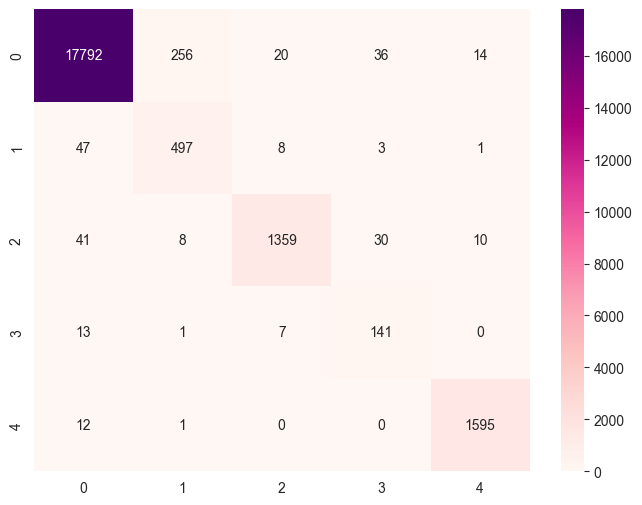

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'RdPu')


In [41]:
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.65      0.89      0.75       556
           2       0.97      0.94      0.96      1448
           3       0.67      0.87      0.76       162
           4       0.98      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.86      0.94      0.89     21892
weighted avg       0.98      0.98      0.98     21892

